# Snake

In [1]:
import environments_fully_observable 
import environments_partially_observable
import numpy as np
from  tqdm import trange
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from agent import *
tf.random.set_seed(0)
random.seed(0)
import math
np.random.seed(0)
%load_ext autoreload
%autoreload 2

2024-06-28 00:37:20.093283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Environment definition

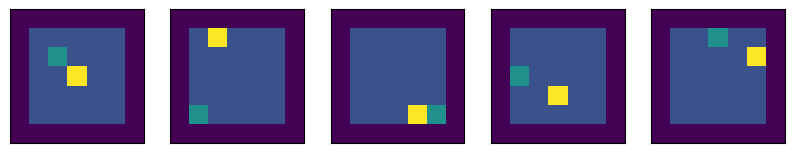

In [2]:
%matplotlib inline
# function to standardize getting an env for the whole notebook
def get_env(n=1000):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    size = 7
    e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # or environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
env_ = get_env()
GAMMA = .9
ITERATIONS = 5000

fig,axs=plt.subplots(1,min(len(env_.boards), 5), figsize=(10,3))
for ax, board in zip(axs, env_.boards):
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.imshow(board, origin="lower")

## Model

## Training

2024-06-10 21:07:43.450069: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


0/1500 - 0
50/1500 - 0
100/1500 - 0.01350999902933836
150/1500 - 0.028173333033919334
200/1500 - 0.04263667017221451
250/1500 - 0.049843329936265945
300/1500 - 0.06254666298627853
350/1500 - 0.06331333518028259
400/1500 - 0.06766999512910843
450/1500 - 0.06572666764259338
500/1500 - 0.07013333588838577
550/1500 - 0.0710500031709671
600/1500 - 0.07034333795309067
650/1500 - 0.07426665723323822
700/1500 - 0.07479333132505417
750/1500 - 0.07922668009996414
800/1500 - 0.07860000431537628
850/1500 - 0.07723666727542877
900/1500 - 0.0821966677904129
950/1500 - 0.08377998322248459
1000/1500 - 0.07937667518854141
1050/1500 - 0.08181332796812057
1100/1500 - 0.08020666241645813
1150/1500 - 0.08299998939037323
1200/1500 - 0.0824766680598259
1250/1500 - 0.08070667833089828
1300/1500 - 0.08386000990867615
1350/1500 - 0.08654667437076569
1400/1500 - 0.08501999825239182
1450/1500 - 0.08403333276510239


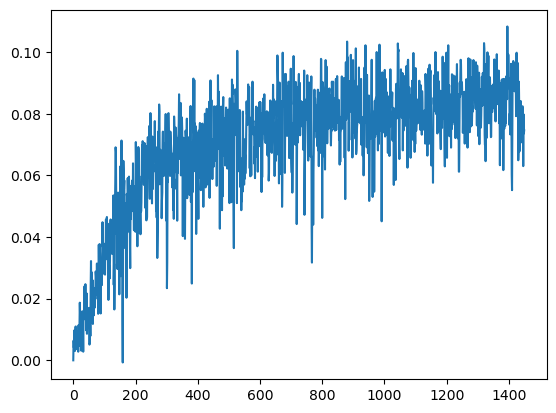

In [4]:
reward_history_agent=[0]
EPOCHS=1500
env_ = get_env()
agent=new_agent(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_agent[-30:]) or 0}", end="\n")
    state=env_.to_state()
    state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_agent.append(np.mean(rewards))
plt.plot(reward_history_agent)

In [6]:
reward_history_agent_trpo=[0]
EPOCHS=1500
env_ = get_env()
agent=TRPO_agent(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_agent[-30:]) or 0}", end="\n")
    state=env_.to_state()
    state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_agent_trpo.append(np.mean(rewards))
plt.plot(reward_history_agent_trpo)

0/1500 - 0.08178332448005676


ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).

Input 0 of layer "conv2d" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (1000, 196)

Call arguments received by layer 'sequential_2' (type Sequential):
  • inputs=tf.Tensor(shape=(1000, 196), dtype=float32)
  • training=None
  • mask=None

0/1500 - 0
50/1500 - 0
100/1500 - 0.03495999798178673
150/1500 - 0.05725999176502228
200/1500 - 0.06340000033378601
250/1500 - 0.06762998551130295
300/1500 - 0.071343332529068
350/1500 - 0.07434333115816116
400/1500 - 0.07733000069856644
450/1500 - 0.07531332969665527
500/1500 - 0.07992333918809891
550/1500 - 0.07847333699464798
600/1500 - 0.0804000049829483
650/1500 - 0.07755666226148605
700/1500 - 0.08103332668542862
750/1500 - 0.08273666352033615
800/1500 - 0.07808666676282883
850/1500 - 0.08569665998220444
900/1500 - 0.08385000377893448
950/1500 - 0.08448665589094162
1000/1500 - 0.09025666862726212
1050/1500 - 0.08492998778820038
1100/1500 - 0.08462335169315338
1150/1500 - 0.08177665621042252
1200/1500 - 0.08852667361497879
1250/1500 - 0.08954000473022461
1300/1500 - 0.0879100114107132
1350/1500 - 0.08634666353464127
1400/1500 - 0.09099666774272919
1450/1500 - 0.08651001006364822


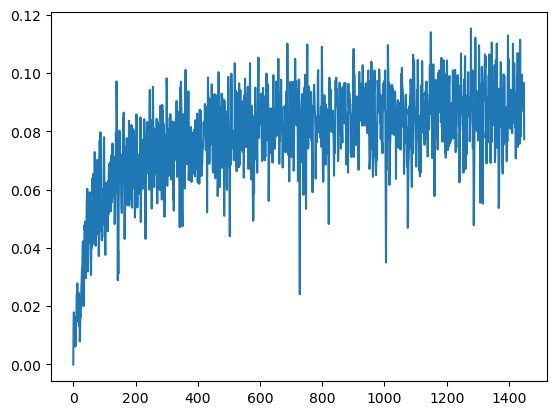

In [7]:
reward_history_conv=[0]
EPOCHS=1500
env_ = get_env()
agent=conv_agent(env=env_)
for e in range(EPOCHS):
    if e%50==0:
        print(f"{e}/{EPOCHS} - {np.mean(reward_history_conv[-30:]) or 0}", end="\n")
    state=env_.to_state()
    #state=tf.reshape(state, (1000, -1))

    original_probs = agent.actor(state)
    pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
    samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
    actions=tf.reshape(samples, (samples.shape[0],1))

    masks=env_.check_actions(actions)

    rewards= env_.move(actions)
    new_state = tf.constant(env_.to_state())
    #new_state=tf.reshape(new_state, (1000, -1))

    agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
    if e > 50: reward_history_conv.append(np.mean(rewards))
plt.plot(reward_history_conv)

0/1500 - 0
50/1500 - 0
100/1500 - 0.002223333576694131
150/1500 - 0.0008033326012082398
200/1500 - 0.011960000731050968
250/1500 - 0.013509999960660934
300/1500 - 0.016706667840480804
350/1500 - 0.01238333247601986
400/1500 - 0.02550666779279709
450/1500 - 0.030233332887291908
500/1500 - 0.07407999038696289
550/1500 - 0.10149998962879181
600/1500 - 0.10220666974782944
650/1500 - 0.10283665359020233
700/1500 - 0.10520332306623459
750/1500 - 0.10570000857114792
800/1500 - 0.10785000026226044
850/1500 - 0.10901665687561035
900/1500 - 0.1084900051355362
950/1500 - 0.1092633381485939
1000/1500 - 0.11019667237997055
1050/1500 - 0.11111333966255188
1100/1500 - 0.11141667515039444
1150/1500 - 0.1108199879527092
1200/1500 - 0.11113666743040085
1250/1500 - 0.11140333861112595
1300/1500 - 0.11216332018375397
1350/1500 - 0.1111433357000351
1400/1500 - 0.1123933270573616
1450/1500 - 0.11353667825460434


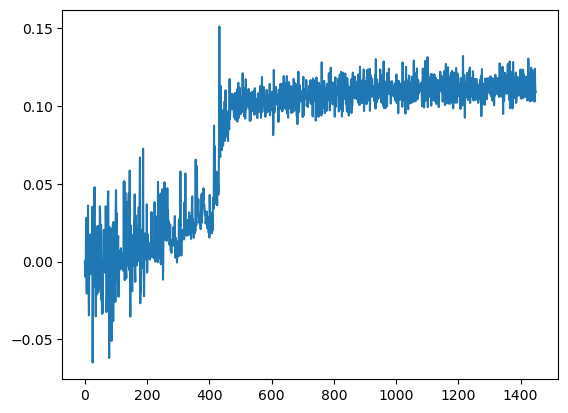

In [11]:
reward_history_dqn=[0]
EPOCHS=1500
env_ = get_env()
agent=DQN(env=env_)
for e in range(EPOCHS):
        if e%50==0:
            print(f"{e}/{EPOCHS} - {np.mean(reward_history_dqn[-30:]) or 0}", end="\n")
        
        #if e%400==0 and e!=0:
        #    step=step+1        

        state=env_.to_state()
        state=tf.reshape(state, (1000, -1))

        value_q=agent.Q_net(state)
        #original_probs = agent.Q_net(state)
        #pred = original_probs / tf.reduce_sum(original_probs, axis=-1, keepdims=True)
        #samples = tf.random.categorical(tf.math.log(pred), 1, dtype=tf.int32)[:, 0]
        samples=tf.argmax(value_q, axis=1)
        actions=tf.reshape(samples, (samples.shape[0],1))

        masks=env_.check_actions(actions)

        rewards= env_.move(actions)
        new_state = tf.constant(env_.to_state())
        new_state=tf.reshape(new_state, (1000, -1))

        agent.learn(state, new_state, samples, rewards) # this optimie the policy function tarting from information sampled
        if e > 50: reward_history_dqn.append(np.mean(rewards))
plt.plot(reward_history_dqn)


 ### Random policy reward
 
Just a baseline (not the one you are supposed to develop)

In [12]:
random_env = get_env(100)
random_rewards = []

for _ in trange(1000):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))

100%|██████████| 1000/1000 [00:01<00:00, 513.34it/s]


In [ ]:
random_rewards = []
env_ = get_env()

for _ in trange(1500):
    probs = tf.convert_to_tensor([[.25]*4]*env_.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = env_.move(actions)
    random_rewards.append(np.mean(rewards))

In [6]:
def rebuild_action(list_of_position):
    action=[]
    list_of_position=np.array(list_of_position)
    for index in range(len(list_of_position)-1):
        if np.all(list_of_position[index]-list_of_position[index+1]==np.array([0,1])):
            action.append(3)
        if np.all(list_of_position[index]-list_of_position[index+1]==np.array([1,0])):
            action.append(0)
        if np.all(list_of_position[index]-list_of_position[index+1]==np.array([0,-1])):
            action.append(1)
        if np.all(list_of_position[index]-list_of_position[index+1]==np.array([-1,0])):
            action.append(2)
    return action


def rebuild_action_path(prioirty_stack, last_postion, lista: list):
    if prioirty_stack[tuple(last_postion)]==None:
        return lista
    else:
        prev=prioirty_stack[tuple(last_postion)]
        lista.append(prev)
        return rebuild_action_path(prioirty_stack, prev, lista)


def compute_neighbours(pos):
    pos_return_0 = np.copy(pos)
    pos_return_1 = np.copy(pos)
    pos_return_2 = np.copy(pos)
    pos_return_3 = np.copy(pos)

    pos_return_0[0] = pos_return_0[0]+1 # move at right
    pos_return_1[1] = pos_return_1[1]+1 # move up
    pos_return_2[0] = pos_return_2[0]-1 # move at left
    pos_return_3[1] = pos_return_3[1]-1 # move down

    return [pos_return_0, pos_return_1, pos_return_2, pos_return_3]

def BFS_search(state):
    visited={}
    selected_path={}
    heads = np.argwhere(state[:,:,1] == 1)[0] # position of the head
    fruit = np.argwhere(state[:,:,3] == 1)[0] # position of the fruit
    boundary = np.argwhere(state[:,:,0] == 0)
    q=[heads]

    for a in range(8):
        for b in range(8):
            visited[(a,b)]=False

    visited[tuple(heads)]=True

    selected_path[tuple(heads)]=None


    while len(q)!=0:
        node = q.pop(0)
        new_pos=compute_neighbours(node)

        for pos in new_pos:
            if tuple(pos)==tuple(fruit):
                selected_path[tuple(pos)]=tuple(node)
                visited[tuple(pos)]
                node=[]
                return pos, selected_path
            if not (np.any(np.all(boundary == pos, axis=1))) and visited[tuple(pos)]==False:
                selected_path[tuple(pos)]=tuple(node)
                visited[tuple(pos)]=True
                q.append(pos)

env_ = get_env()
state=env_.to_state()
action_list_all_state={}
BFS_rewards=[]

for _ in trange(1500):
    for i in range(state.shape[0]):
        p,sl=BFS_search(state[i,:,:])
        action=rebuild_action_path(sl, p, [])
        action.insert(0, p)
        action_list=rebuild_action(action)
        action_list_all_state[i]=action_list

    #tf.reshape(tf.convert_to_tensor(action_list_all_state), (3341,1))

    action=[]
    for chiave in action_list_all_state.keys():
        try:
            action.append(action_list_all_state[chiave][0])
        except TypeError:
            action.append(action_list_all_state[chiave])
    
    reward=env_.move(tf.reshape(tf.convert_to_tensor(action), (1000,1)))
    BFS_rewards.append(np.mean(reward))

100%|██████████| 1500/1500 [09:52<00:00,  2.53it/s]


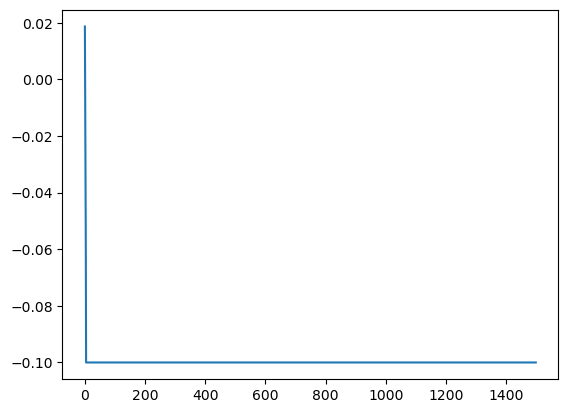

In [7]:
plt.plot(BFS_rewards)

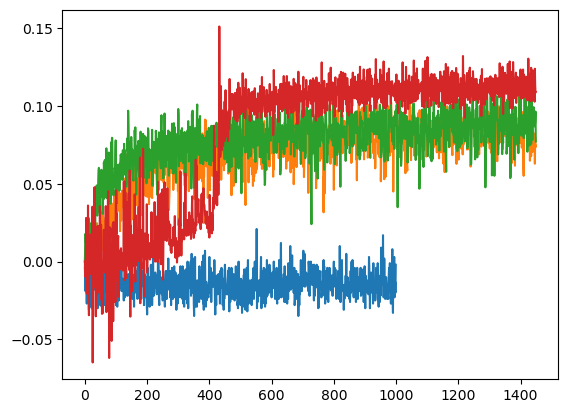

In [13]:
plt.plot(random_rewards)
plt.plot(reward_history_agent)
plt.plot(reward_history_conv)
plt.plot(reward_history_dqn)